
# Perceptron  
[퍼셉트론](https://ko.wikipedia.org/wiki/%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0)  은 최초의 인공신경망으로 인공신경망의 기초가 되는 알고리즘이다.



퍼셉트론은 두 개의 노드가 있을 경우, 그 두 개의 노드가 각각 들어가야 하는 위치인 입력치(input)와 그를 가중하는 가중치(weight), 이를 통해 계산하여 나온 결과인 출력 값(ouput)으로 구성되어 있다. 
필요하면 편향(bias)를 추가해 결과 경향을 조정할 수 있다  



Input과 weight의 곱의 합이 사전에 설정한 임계값(threshold, θ)과 비교하여 θ를 넘으면 Output으로 1을 출력하고, 0을 출력함  



weight는 입력신호가 결과 출력에 주는 영향도를 조절하는 매개변수이고,  
bias은 노드(x)가 얼마나 쉽게 활성화(1 출력; activation)되느냐를 조정하는(adjust) 매개변수이다.



처음은 임의로 설정된 weight로 시작하여 
학습데이터를 입력하여 분류가 잘못될 때마다 weight 개선해나간다  
퍼셉트론은 모든 학습모형을 정확히 분류시킬때까지 학습이 진행되기 때문에 데이터가 선형적으로 분리될 수 있을 때 적합한 알고리즘.  
퍼셉트론은 XOR 같은 분류는 못하고 선형 분류만 가능한 한계점이 있다







과적합은 모델이 아주 유연하여 학습데이터 외 데이터에 성능이 낮은 상태를 말함(어느 데이터나 일반적으로 잘 들어맞는 것이 중요)  
bias가 높을수록 분류 기준이 엄격하다는 의미며 모델이 간단해지는 경향이 있다(과소적합 위험)  
bias가 낮을 수록 데이터의 허용 범위가 넓어져 불필요한 노이즈가 포함될 가능성 높다.  
(이부분은 [편향과 분산의 트레이드오프 관계](https://ko.wikipedia.org/wiki/%ED%8E%B8%ED%96%A5-%EB%B6%84%EC%82%B0_%ED%8A%B8%EB%A0%88%EC%9D%B4%EB%93%9C%EC%98%A4%ED%94%84)라 함)  


In [5]:
import numpy as np

## 퍼셉트론으로 AND, NAND, OR 논리회로 구현  


<AND게이트 진리표>  

|x1|x2|y|
|:---:|:---:|:---:|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

In [7]:
# AND 게이트 (기본 구조)
def AND(x1, x2):  
  w1, w2, threshold = 0.5, 0.5, 0.7
  tmp = x1*w1 + x2*w2 
  if tmp <= threshold: 
    return 0
  else: 
    return 1

print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


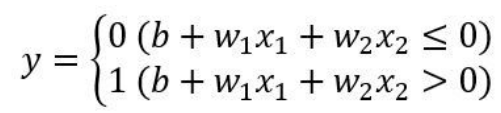

In [9]:
# 편향(bias) 도입
# 지금은 w,b의 값을 지정했지만, w와 b의 값을 스스로 찾는 과정을 딥러닝에서 학습이라함
def AND_b(x1,x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

print(AND_b(0,0))
print(AND_b(1,0))
print(AND_b(0,1))
print(AND_b(1,1))

0
0
0
1


<NAND게이트 진리표>  

|x1|x2|y|
|:---:|:---:|:---:|
|0|0|1|
|1|0|1|
|0|1|1|
|1|1|0|

In [12]:
def NAND(x1, x2):  
  x = np.array([x1,x2])
  w = np.array([-0.5,-0.5]) # AND게이트와 반대의 값을 가지기에 편향 부호를 반대로 해줌
  b = 0.7
  tmp = np.sum(x*w)+ b 
  if tmp <= 0: 
    return 0
  else: 
    return 1

print(NAND(0,0))
print(NAND(1,0))
print(NAND(0,1))
print(NAND(1,1))

1
1
1
0


<OR게이트 진리표>  

|x1|x2|y|
|:---:|:---:|:---:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|1|

In [13]:
def OR(x1, x2):  
  x = np.array([x1,x2])
  w = np.array([0.5,0.5]) 
  b = -0.2
  tmp = np.sum(x*w)+ b 
  if tmp <= 0: 
    return 0
  else: 
    return 1

print(OR(0,0))
print(OR(1,0))
print(OR(0,1))
print(OR(1,1))

0
1
1
1


<XOR게이트 진리표>  

|x1|x2|y|
|:---:|:---:|:---:|
|0|0|1|
|1|0|0|
|0|1|0|
|1|1|0|

XOR 논리회로는 비선형 함수를 통해 해결해야하기 때문에 퍼셉트론으로는 구현이 불가능하다.  
